# This example shows how to create a bunch from the Twiss parameters

In [1]:
import RF_Track as RFT
import numpy as np
import matplotlib.pyplot as plt

## Single-particle parameters

In [2]:
# Single-particle parameters
mass = RFT.electronmass # MeV/c^2
P = 100 # MeV/c
Q = -1 # e+

## Specifying the Twiss parameters

In [3]:
# Bunch
Nparticles = 5000

Twiss = RFT.Bunch6d_twiss()
Twiss.emitt_x = 10 # mm.mrad normalised emittance
Twiss.emitt_y = 10 # mm.mrad
Twiss.beta_x = 5 # m
Twiss.beta_y = 3 # m
Twiss.alpha_x = 0.5
Twiss.alpha_y = -0.5

B0 = RFT.Bunch6d(mass, 0.0, Q, P, Twiss, Nparticles)

### Let's plot the phase space

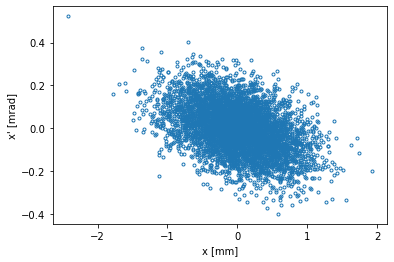

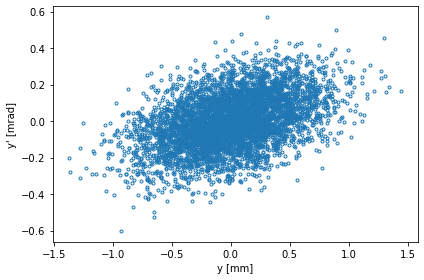

In [4]:
M0 = B0.get_phase_space()
M0[0:9,:]

plt.figure()
plt.plot(M0[:,0], M0[:,1], '.', mfc='none')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")

plt.figure()
plt.plot(M0[:,2], M0[:,3], '.', mfc='none')
plt.xlabel('y [mm]')
plt.ylabel("y' [mrad]")
plt.tight_layout()

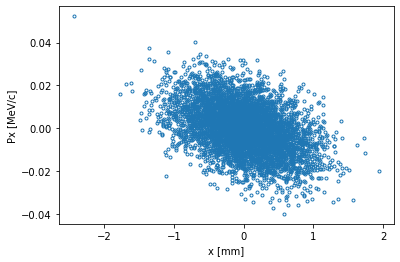

In [5]:
M = B0.get_phase_space('%x %Px')

plt.figure()
plt.plot(M[:,0], M[:,1], '.', mfc='none');
plt.xlabel('x [mm]');
plt.ylabel('Px [MeV/c]');

### Let's inquire the bunch properties

In [6]:
I0 = B0.get_info()
beta_x = I0.beta_x
beta_y = I0.beta_y
sigma_t = I0.sigma_t
sigma_pt = I0.sigma_pt
print(beta_x)
print(beta_y)
print(sigma_t)
print(sigma_pt)

4.852639864241487
2.9947968275507297
0.0
0.0


# Interlude
### Pseudo-random vs. quasi-random numbers
Pseudo-random and quasi-random numbers are methods for generating sequences of seemingly random numbers, but they have different characteristics and purposes.

* Pseudo-random numbers are generated by algorithms called pseudo-random number generators (PRNGs). PRNGs start with an initial value called a seed and then use mathematical formulas or algorithms to generate a sequence of numbers that appears to be random.

* Quasi-random numbers (also known as low-discrepancy sequences or deterministic sequences) are noiseless distributions generated in a deterministic way, but they are designed to have better distribution properties than pseudo-random numbers.

Text(0.5, 1.0, 'Quasi-random')

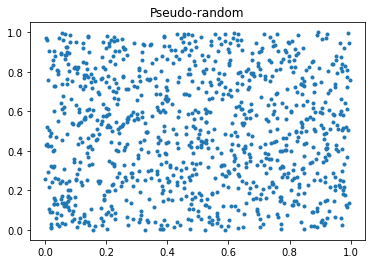

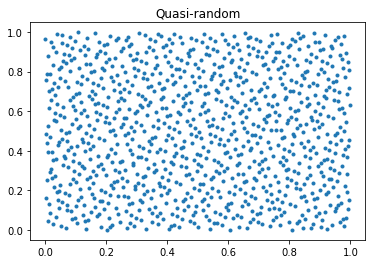

In [7]:
N = 1000

PR = np.random.rand(N, 2)
QR = RFT.qrand(N, 2)

plt.figure()
plt.plot(PR[:,0], PR[:,1], '.')
plt.title('Pseudo-random')

plt.figure()
plt.plot(QR[:,0], QR[:,1], '.')
plt.title('Quasi-random')

RF-Track gives the possibility to create quasi-random bunches from the Twiss parameters

In [8]:
B0_QR = RFT.Bunch6d_QR(mass, 0.0, Q, P, Twiss, Nparticles)

(-0.5, 0.5)

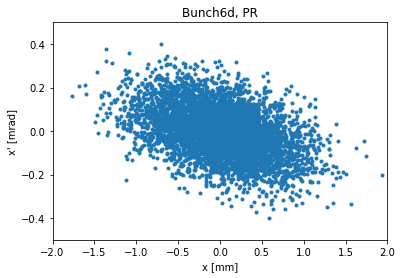

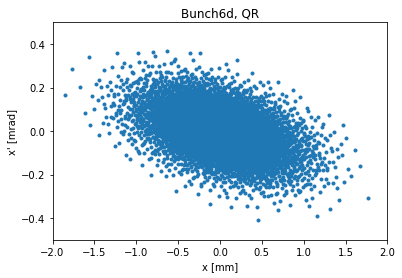

In [9]:
M0_QR = B0_QR.get_phase_space()

plt.figure()
plt.plot(M0[:,0], M0[:,1], '.')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.xlim([-2, 2])
plt.ylim([-0.5, 0.5])
plt.title('Bunch6d, PR');

plt.figure()
plt.plot(M0_QR[:, 0], M0_QR[:, 1], '.')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")
plt.title('Bunch6d, QR')
plt.xlim([-2, 2])
plt.ylim([-0.5, 0.5])

In [10]:
I0 = B0_QR.get_info()
beta_x = I0.beta_x
beta_y = I0.beta_y
sigma_t = I0.sigma_t
sigma_pt = I0.sigma_pt
print(beta_x)
print(beta_y)
print(sigma_t)
print(sigma_pt)

5.00240762535633
3.0002641698238794
0.0
0.0
